# Merge Sort

[Click here to run this chapter on Colab](https://colab.research.google.com/github/AllenDowney/DSIRP/blob/main/notebooks/mergesort.ipynb)

## Implementing Merge Sort

[Merge sort](https://en.wikipedia.org/wiki/Merge_sort) is a divide and conquer strategy:

1. Divide the sequence into two halves,

2. Sort the halves, and

3. Merge the sorted sub-sequences into a single sequence.

Since step 2 involves sorting, this algorithm is recursive, so we need a base case.
There are two options:

1. If the size falls below some threshold, we can use another sort algorithm.

2. If the size of a sub-sequence is 1, it is already sorted.

[Comparison with other sort algorithms](https://en.wikipedia.org/wiki/Merge_sort#Comparison_with_other_sort_algorithms)

To implement merge sort, I think it's helpful to start with a non-recursive version that uses the Python `sort` function to sort the sub-sequences.

In [1]:
def merge_sort_norec(xs):
    n = len(xs)
    mid = n//2
    left = xs[:mid]
    right = xs[mid:]

    left.sort()
    right.sort()

    return merge(left, right)

**Exercise:** Write a function called `merge` that takes two sorted sequences, `left` and `right`, and returns a sequence that contains all elements from `left` and `right`, in ascending order (or non-decreasing order, to be more precise).

Note: this function is not conceptually difficult, but it is notoriously tricky to get all of the edge cases right without making the function unreadable.
Take it as a challenge to write a version that is correct, concise, and readable.
I found that I could write it more concisely as a generator function.

In [2]:
from collections import deque

def merge(left,right):
  sorted_lst = []
  left = deque(left)
  right = deque(right)
  while left or right:
    if left:
      left_val = left[0]
    else:
      sorted_lst.extend(right)
      break
    if right:
      right_val = right[0]
    else:
      sorted_lst.extend(left)
      break
    if left_val>right_val:
      sorted_lst.append(right_val)
      right.popleft()
    else:
      sorted_lst.append(left_val)
      left.popleft()
  return sorted_lst






You can use the following example to test your code.

In [3]:
import random

population = range(100)
xs = random.sample(population, k=6)
ys = random.sample(population, k=6)
ys

[70, 43, 56, 2, 57, 27]

In [4]:
xs.sort()
ys.sort()
ys

[2, 27, 43, 56, 57, 70]

In [5]:
res = list(merge(xs, ys))
res

[2, 2, 5, 20, 27, 43, 43, 46, 56, 57, 64, 70]

In [6]:
sorted(res) == res

True

**Exercise:**  Starting with `merge_sort_norec`, write a function called `merge_sort_rec` that's fully recursive; that is, instead of using Python's `sort` function to sort the halves, it should use `merge_sort_rec`.  Of course, you will need a base case to avoid an infinite recursion.



In [7]:
def merge_sort_norec(xs):
    n = len(xs)
    mid = n//2
    left = xs[:mid]
    right = xs[mid:]

    left.sort()
    right.sort()

    return merge(left, right)

In [13]:
def merge_sort_rec(xs):
    n = len(xs)
    if n <= 1:
        return xs

    mid = n // 2
    left = xs[:mid]
    right = xs[mid:]

    return merge(merge_sort_rec(left), merge_sort_rec(right))

Test your method by running the code in the next cell, then use `test_merge_sort_rec`, below, to check the performance of your function.

In [9]:
xs = random.sample(population, k=12)
xs

[38, 26, 0, 5, 36, 28, 60, 15, 48, 74, 95, 85]

In [15]:
res = list(merge_sort_rec(xs))
res

[0, 5, 15, 26, 28, 36, 38, 48, 60, 74, 85, 95]

In [16]:
sorted(res) == res

True

## Heap Merge

Suppose we want to merge more than two sub-sequences.
A convenient way to do that is to use a heap.
For example, here are three sorted sub-sequences.

In [17]:
xs = random.sample(population, k=5)
ys = random.sample(population, k=5)
zs = random.sample(population, k=5)

min(xs), min(ys), min(zs)

(3, 15, 17)

In [18]:
xs.sort()
ys.sort()
zs.sort()

For each sequence, I'll make an iterator and push onto the heap a tuple that contains:

* The first element from the iterator,

* An index that's different for each iterator, and

* The iterator itself.

When the heap compares two of these tuples, it compares the elements first.
If there's a tie, it compares the indices.
Since the indices are unique, there can't be a tie, so we never have to compare iterators (which would be an error).

In [19]:
sequences = [xs, ys, zs]

In [20]:
from heapq import heappush, heappop

heap = []
for i, seq in enumerate(sequences):
    iterator = iter(seq)
    first = next(iterator)
    heappush(heap, (first, i, iterator))

When we pop a value from the heap, we get the tuple with the smallest value.

In [21]:
value, i, iterator = heappop(heap)
value

3

If we know that the iterator has more values, we can use `next` to get the next one and then push a tuple back into the heap.

In [22]:
heappush(heap, (next(iterator), i, iterator))

If we repeat this process, we'll get all elements from all sub-sequences in ascending order.

However, we have to deal with the case where the iterator is empty.
In Python, the only way to check is to call `next` and take your chances!
If there are no more elements in the iterator, `next` raises a `StopIteration` exception, which you can handle with a `try` statement, like this:

In [23]:
iterator = iter(xs)

while True:
    try:
        print(next(iterator))
    except StopIteration:
        break

3
73
75
79
90


**Exercise:** Write a generator function called `heapmerge` that takes a list of sequences and yields the elements from the sequences in increasing order.

In [24]:
def heap_merge(seq_lst):
  heap = []
  for i, seq in enumerate(sequences):
      iterator = iter(seq)
      first = next(iterator)
      heappush(heap, (first, i, iterator))
  while heap:
      value, i, iterator = heappop(heap)
      yield value
      try:
          nextval = next(iterator)
          heappush(heap, (nextval, i, iterator))
      except StopIteration:
          pass


You can use the following examples to test your function.

In [26]:
seq = list(heap_merge([xs, ys, zs]))
seq

[3, 15, 17, 32, 48, 73, 73, 75, 77, 78, 79, 90, 91, 94, 95]

In [27]:
sorted(seq) == seq

True

The `heapq` module provides a function called `merge` that implements this algorithm.

## Comparing sort algorithms

NumPy provides implementations of three sorting algorithms, quicksort, mergesort, and heapsort.

In theory that are all in `O(n log n)`.
Let's see what that looks like when we plot runtime versus problem size.


In [28]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://github.com/AllenDowney/DSIRP/raw/main/timing.py')

Downloaded timing.py


In [29]:
from timing import run_timing_test, plot_timing_test

1024 0.00999999999999801
2048 0.0
4096 0.0
8192 0.0
16384 0.0
32768 0.010000000000001563
65536 0.0
131072 0.00999999999999801
262144 0.010000000000001563
524288 0.03999999999999915
1048576 0.07000000000000028
2097152 0.14000000000000057
4194304 0.27999999999999936
8388608 0.5800000000000001
16777216 1.1500000000000004


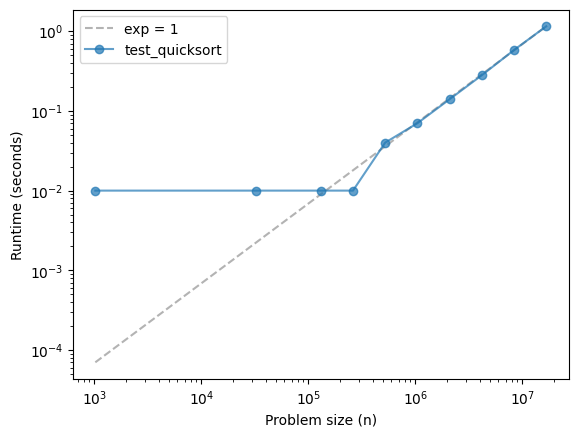

In [30]:
import numpy as np

def test_quicksort(n):
    xs = np.random.normal(size=n)
    xs.sort(kind='quicksort')

ns, ts = run_timing_test(test_quicksort)
plot_timing_test(ns, ts, 'test_quicksort', exp=1)

quicksort is hard to distinguish from linear, up to about 10 million elements.

1024 0.00999999999999801
2048 0.0
4096 0.0
8192 0.0
16384 0.0
32768 0.010000000000001563
65536 0.010000000000001563
131072 0.029999999999997584
262144 0.05000000000000071
524288 0.10000000000000142
1048576 0.21999999999999886
2097152 0.4599999999999973
4194304 0.9500000000000028
8388608 1.9800000000000004


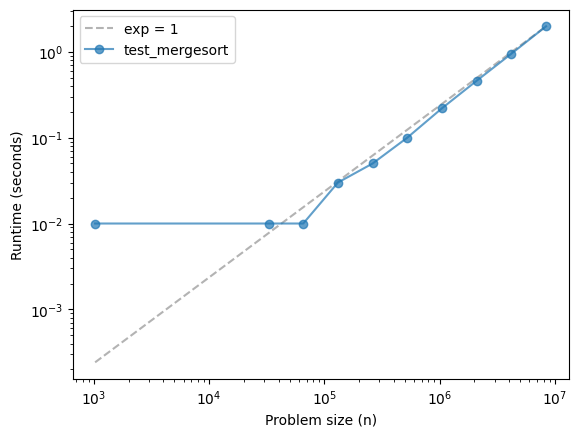

In [31]:
def test_mergesort(n):
    xs = np.random.normal(size=n)
    xs.sort(kind='mergesort')

ns, ts = run_timing_test(test_mergesort)
plot_timing_test(ns, ts, 'test_mergesort', exp=1)

Merge sort is similar, maybe with some upward curvature.

1024 0.0
2048 0.0
4096 0.0
8192 0.0
16384 0.0
32768 0.010000000000001563
65536 0.0
131072 0.00999999999999801
262144 0.010000000000001563
524288 0.03999999999999915
1048576 0.060000000000002274
2097152 0.129999999999999
4194304 0.259999999999998
8388608 0.5599999999999987
16777216 1.1300000000000026


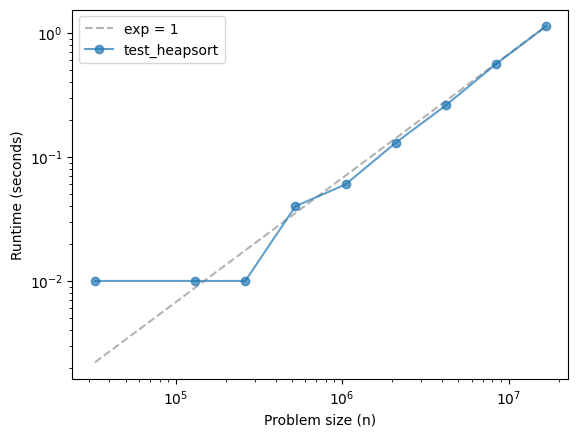

In [32]:
def test_heapsort(n):
    xs = np.random.normal(size=n)
    xs.sort(kind='heapsort')

ns, ts = run_timing_test(test_quicksort)
plot_timing_test(ns, ts, 'test_heapsort', exp=1)

The three methods are effectively linear over this range of problem sizes.

And their run times are about the same, with quicksort being the fastest, despite being the one with the worst asympotic performance in the worst case.

Now let's see how our implementation of merge sort does.

1024 0.0
2048 0.019999999999999574
4096 0.030000000000001137
8192 0.07000000000000028
16384 0.16000000000000014
32768 0.23000000000000043
65536 0.379999999999999
131072 0.7399999999999984
262144 1.6200000000000045


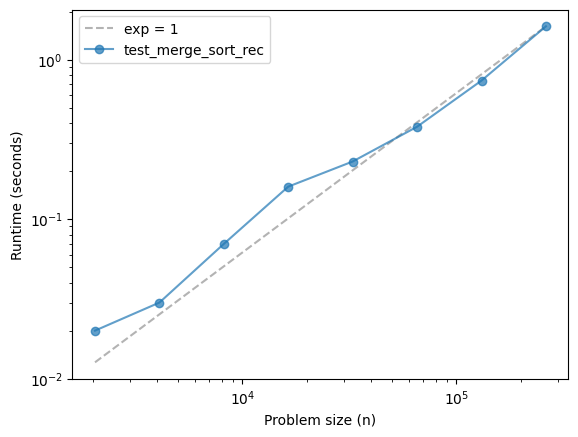

In [33]:
def test_merge_sort_rec(n):
    xs = np.random.normal(size=n)
    spectrum = merge_sort_rec(xs)

ns, ts = run_timing_test(test_merge_sort_rec)
plot_timing_test(ns, ts, 'test_merge_sort_rec', exp=1)

If things go according to plan, our implementation of merge sort should be close to linear, or a little steeper.

*Data Structures and Information Retrieval in Python*

Copyright 2021 Allen Downey

License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)